In [1]:
import requests
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import hstack

Download text data from [Source: UCI / Housing (Boston)](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale).

In [2]:
housing_data_url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale'
data = requests.get(housing_data_url)
housing_svmlight_file_name = 'housing_scale.svm'
with open(housing_svmlight_file_name, 'w') as f:
    f.write(data.text)

In [3]:
housing_svmlight_file_name = 'housing_scale.svm'
X, y = load_svmlight_file(housing_svmlight_file_name)

In [4]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)

In [5]:
def linear_fn(x, w):
    return x.dot(w)

In [6]:
def loss_fn(x, y, w):
    m = len(y)
    return np.sum((x.dot(w) - y) ** 2) / (2 * m)

In [7]:
# x0 = np.ones((len(y_train), 1))
# X_train_origin = X_train
# X_train = hstack([x0, X_train])
# w = np.zeros(X_train.shape[1])
# X_train_origin

In [8]:
# initial_loss = loss_fn(X_train, y_train, w)
# initial_loss

In [9]:
def gradient_descent(x, y, w=None, alpha=0.001, iterations=50000):
    x0 = np.ones((len(y), 1))
    x = hstack([x0, x])
    if w == None:
        w = np.zeros(x.shape[1])
    
    loss_history = [0] * iterations
    m = len(y)
    
    for iteration in range(iterations):
        h = x.dot(w)
        loss = h - y
        
        gradient = x.T.dot(loss) / m
        w = w - alpha * gradient
        loss = loss_fn(x, y, w)
        loss_history[iteration] = loss
        
    return w, loss_history

In [10]:
new_w, loss_history = gradient_descent(X_train, y_train)
print(new_w)
print(loss_history[-1])

[  9.02769433  -6.56102193   2.10345671  -0.96229222   1.44318495
  -4.21965451   8.10427306   0.04446416  -8.88013242   3.34412464
  -2.5245555   -4.28227448   1.80665389 -10.00701573]
11.3213700478


In [11]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [12]:
y_pred = hstack([np.ones((len(y_train), 1)), X_train]).dot(new_w)

In [13]:
print(rmse(y_train, y_pred))
print(r2_score(y_train, y_pred))

4.75843882965
0.729940833545


In [14]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred_sk = clf.predict(X_train)
print(rmse(y_train, y_pred_sk))
print(r2_score(y_train, y_pred_sk))

5.01179783065
0.700417094174


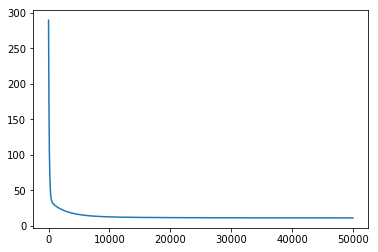

In [15]:
plt.plot(loss_history)
plt.show()

In [16]:
_, loss_history_validation = gradient_descent(X_validation, y_validation)

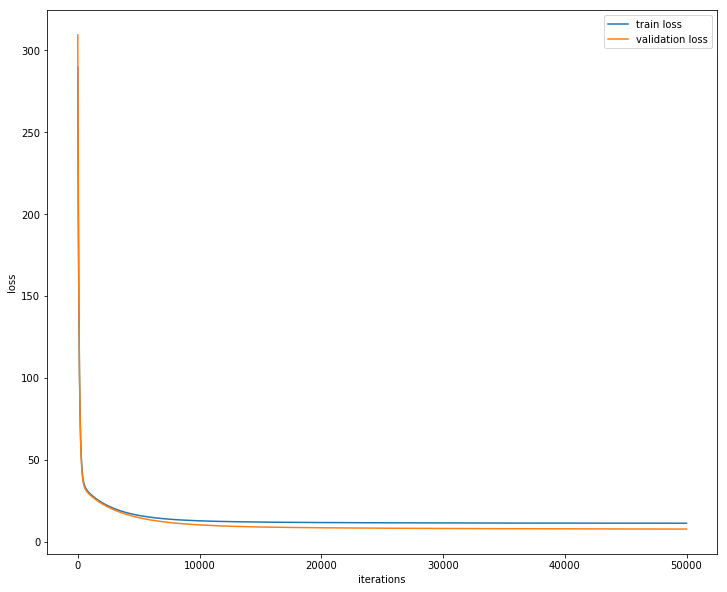

In [18]:
plt.figure('loss', figsize=(12, 10))
plt.plot(loss_history, label='train loss')
plt.plot(loss_history_validation, label='validation loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
plt.savefig('regression.png')